<a href="https://colab.research.google.com/github/mxnlmn/ML4.4_PW/blob/main/%D0%9F%D0%A010_%D0%A2%D0%B8%D0%BC%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_%D0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np


In [35]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Кодування категорій (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [36]:
# Створення моделі
model = Sequential()

# Додавання повністю з'єднаних шарів
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Встановлення функції втрат та оптимізатора
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/20
625/625 [==============================] - 11s 17ms/step - loss: 1.9071 - accuracy: 0.3093 - val_loss: 1.7534 - val_accuracy: 0.3642
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 1.7175 - accuracy: 0.3819 - val_loss: 1.6419 - val_accuracy: 0.4145
Epoch 3/20
625/625 [==============================] - 12s 18ms/step - loss: 1.6311 - accuracy: 0.4183 - val_loss: 1.6327 - val_accuracy: 0.4078
Epoch 4/20
625/625 [==============================] - 11s 18ms/step - loss: 1.5731 - accuracy: 0.4366 - val_loss: 1.6219 - val_accuracy: 0.4114
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 1.5260 - accuracy: 0.4536 - val_loss: 1.5641 - val_accuracy: 0.4379
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4993 - accuracy: 0.4655 - val_loss: 1.5302 - val_accuracy: 0.4435
Epoch 7/20
625/625 [==============================] - 11s 18ms/step - loss: 1.4712 - accuracy: 0.4726 - val_loss: 1.5018 - val_accuracy:

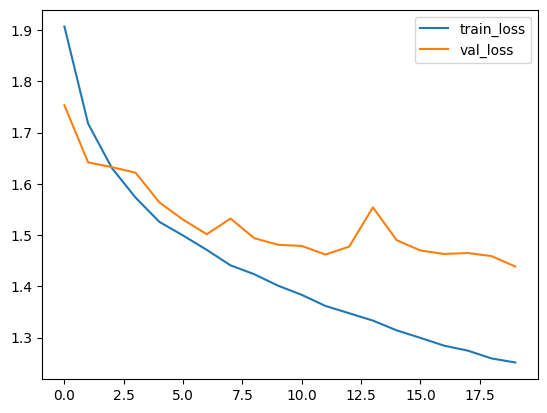

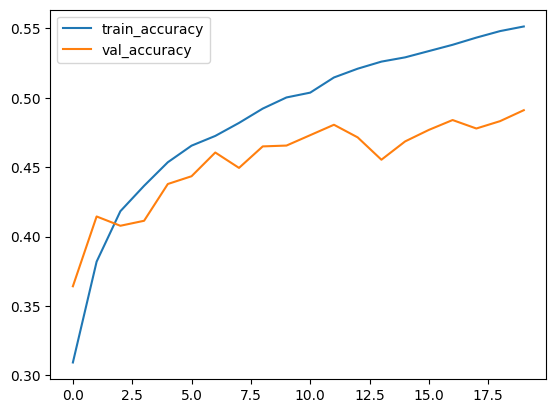

In [37]:
# Тренування моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

# Виведення графіків функції втрат та точності

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [38]:
# Оцінка точності на тестовому наборі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 2s 8ms/step - loss: 1.4216 - accuracy: 0.4948
Test Accuracy: 0.49480000138282776


In [39]:
# Вибір 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], size=10, replace=False)
random_images = x_test[random_indices]

# Передбачення класів
predictions = model.predict(random_images)

# Виведення результатів
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Predicted Class: {predicted_class}, True Class: {true_class}")

1/1 [==============================] - 0s 106ms/step
Predicted Class: 8, True Class: 4
Predicted Class: 2, True Class: 2
Predicted Class: 9, True Class: 9
Predicted Class: 1, True Class: 1
Predicted Class: 4, True Class: 4
Predicted Class: 8, True Class: 3
Predicted Class: 2, True Class: 2
Predicted Class: 4, True Class: 4
Predicted Class: 8, True Class: 0
Predicted Class: 9, True Class: 7
